<img src="./Stencils/Leapfrog_stencil.png" align="right" width="500px"/>

# Leapfrog method

In this notebook I will solve the advection equation $u_t + a u_x=0$ with the Leapfrog method. It provides the value of the evolution in time of the $u$ function as: 

$$u_{j}^{n+1} = u_{j}^{n-1} - \frac{a \Delta t}{\Delta x} (u_{j+1}^{n} - u_{j-1}^{n})$$.

This method is second order.

We will use a gaussian profile as the initial condition: 

$$u(x,t=0)=\exp{[-(x-x_0)^2]}$$, with $x_0=5$.

We will set the domain to $x\in [0,10]$ with $\textbf{periodic}$ boundary conditions.

This method requires an additional array to save the $u_{j}^{n-1}$ information. To have it in the first iteration there are two possible ways: 

- cheat: use the knowledge on the solution to set it as the first element in the iteration; 
- use LF as first step, and then iterate from that point on.

<br clear="right"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


We define the quantities we need:

In [2]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.abs(a)   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [3]:
# Define the initial condition
time=[]
x0=5
t=0
i=0
u_initial = np.exp(-(x-x0)**2)
u_initial_2 =  np.exp(-((x+a*dt)-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()
u_previous = u_initial_2.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))


#advance the time 
t += dt
i += 1
time.append(t)

## Solving the equation

We solve the equation: 

In [4]:
total_sol = []

In [5]:
while t < t_final:
    
    total_sol.append(u_current)
    
    # Compute the new solution using the Leapfrog method

    u_next = u_previous - a * dt / dx * (np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_previous = u_current.copy()
    u_current = u_next.copy()
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
                
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
                
        plt.plot(x, u_current, c='grey')
        plt.title('Time='+str(round(t,2)), fontsize=13)
        plt.ylim(0,1.1)
        plt.xlabel("x [IU]")
        plt.ylabel("$\mathrm{u}(x, t)$")
        plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

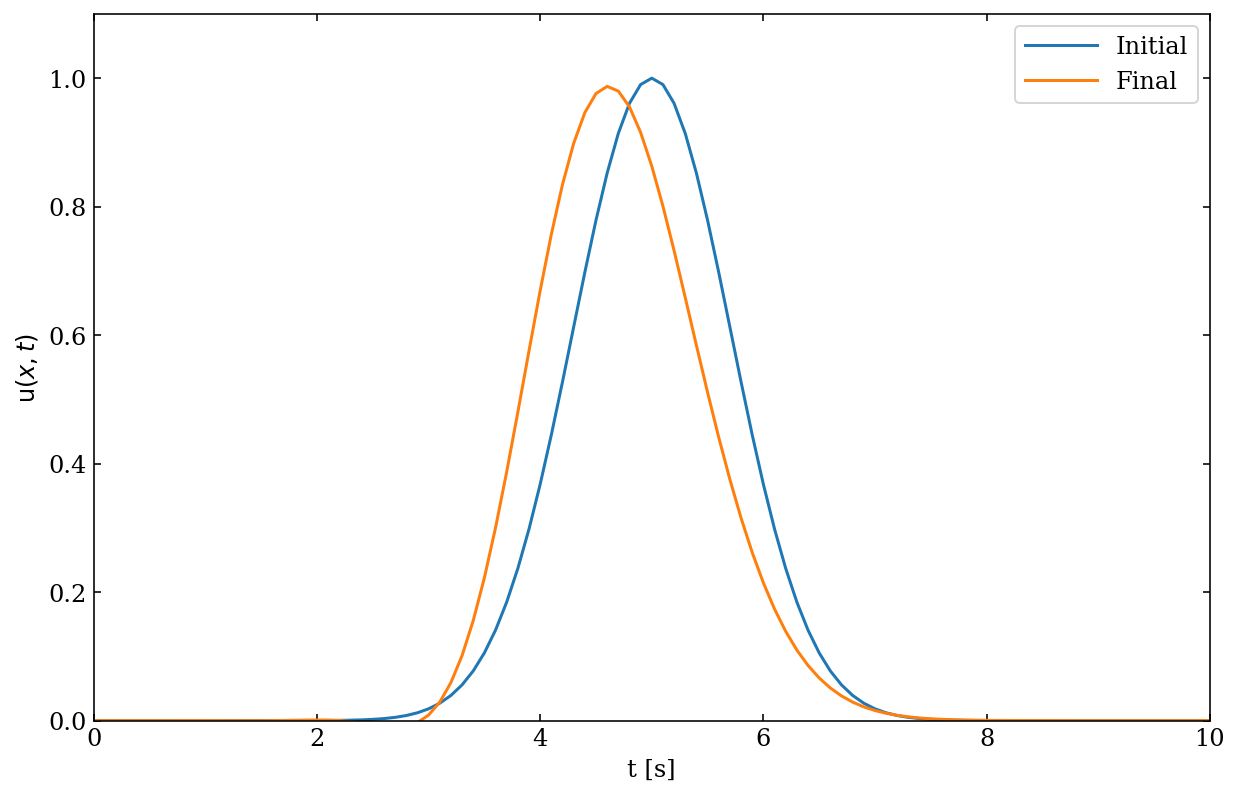

In [6]:
plt.figure(figsize = (10, 6.5))
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
#plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.show()

See the values of the norm as time passes:  

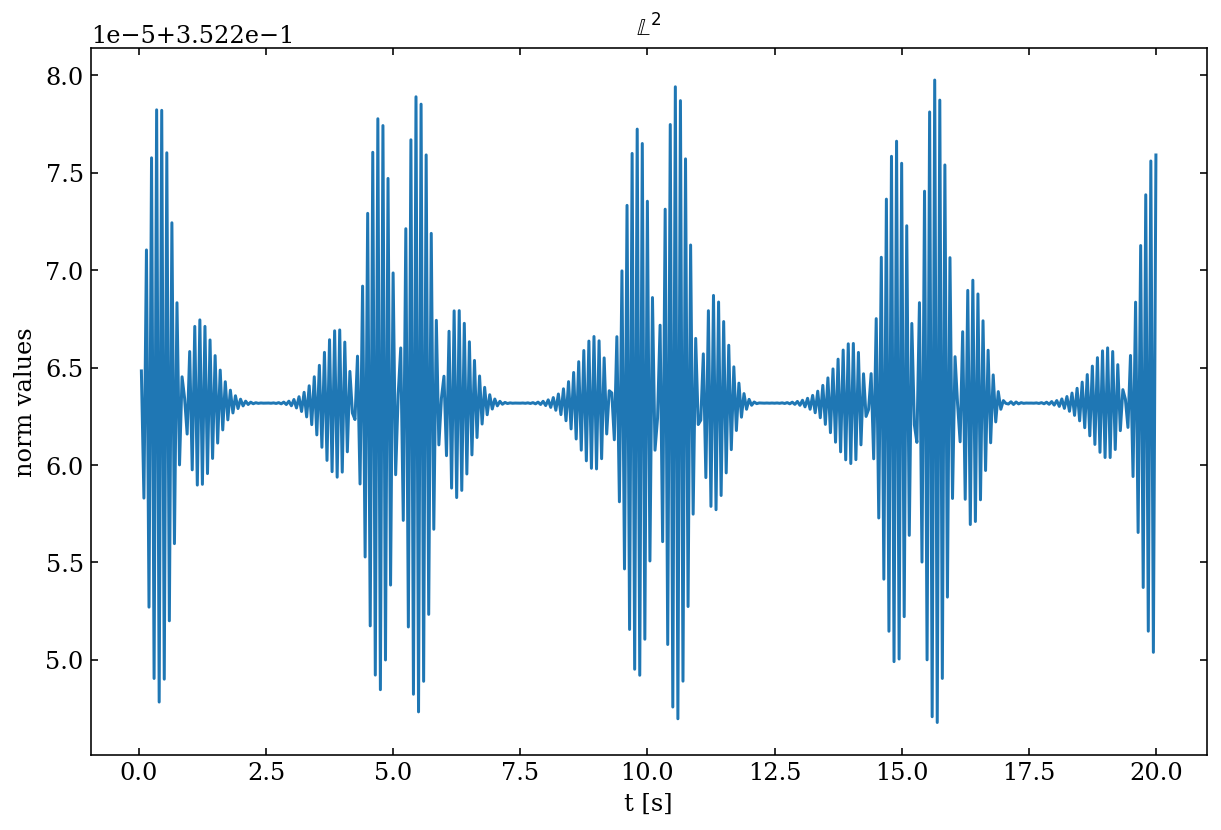

In [7]:
plt.figure(figsize = (10, 6.5))
plt.plot(time,l2norm)
plt.xlabel("t [s]")
plt.ylabel("norm values")
plt.title("$\mathbb{L}^2$")
plt.margins(0.05, 0.05)
plt.show()

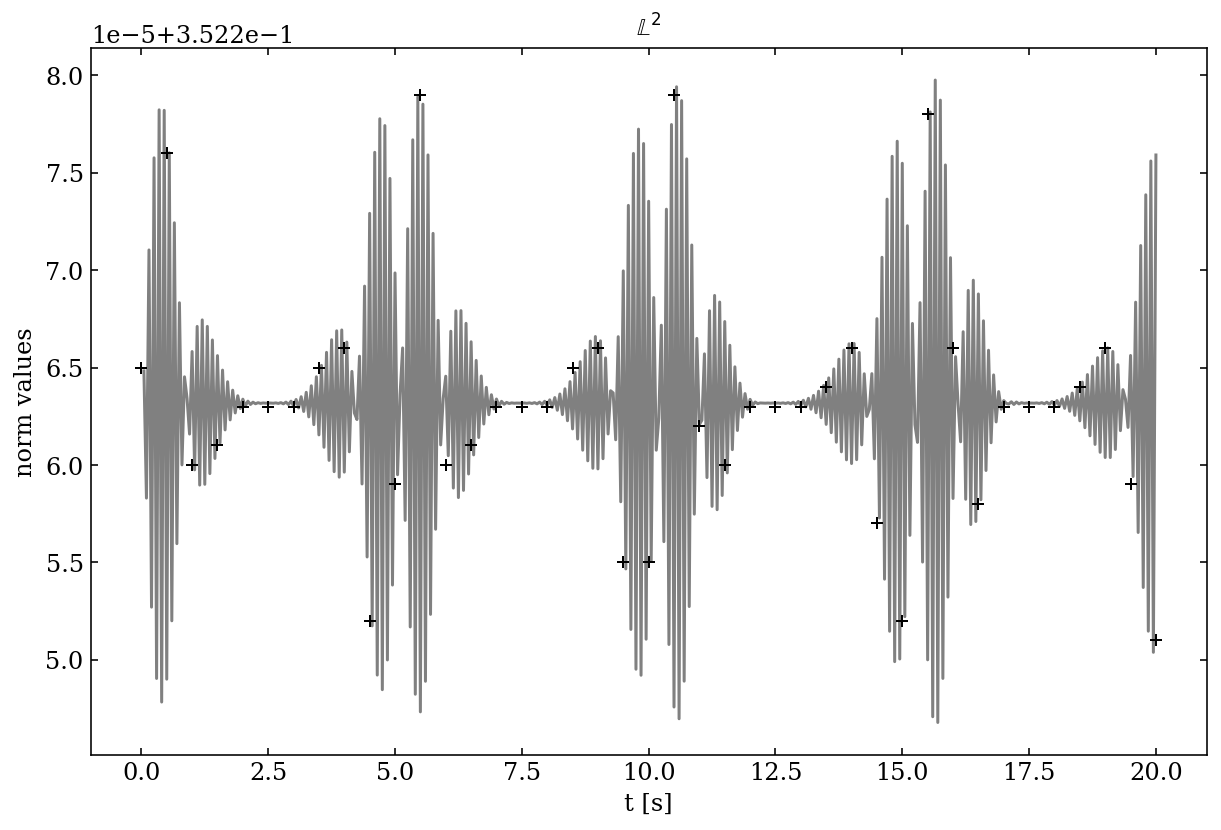

In [8]:
#Compare with data stored
plt.figure(figsize = (10, 6.5))
l2_saved=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')
plt.plot(time,l2norm, c='grey')
plt.xlabel("t [s]")
plt.ylabel("norm values")
plt.title("$\mathbb{L}^2$")
plt.plot(l2_saved[:,0], l2_saved[:,1], '+', c='black')
plt.margins(0.05, 0.05)
plt.savefig("norm_lf.png")
plt.show()

### FuncAnimation animations:

Here I just report an additional code I developed to see animation without having to save the images every time.

In [9]:
import matplotlib.animation as animation
import seaborn as sns

<IPython.core.display.Javascript object>


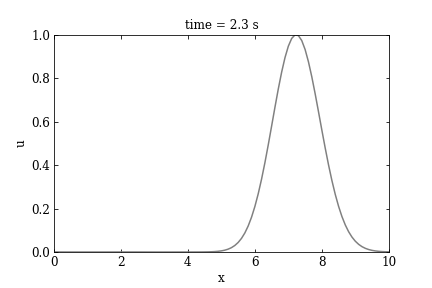

In [11]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, '-', c='grey')
plotTitle = ax.set_title("t=0")
ax.set_ylim(-0,1.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"time = {t/395 * 20:.1f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 5), blit=True)
ani.save('u_Leapfrog.gif')
plt.show()

There are some slight oscillation on the left hand side of the solution. They might be imperceptible fot $t_{max} = 20 \ s$ but should be better seen for bigger $t_s$.

### Appendix: stuff I previously wrote